In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=2a2cfe88abe3bd8c914c6979d585a44854f77ad9ce961820d48885fced420b77
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math as mt
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_auc_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn import metrics, model_selection
from sklearn.model_selection import KFold, cross_val_score
import statsmodels.api as sm
import scipy
import scipy.stats as sps
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r'/content/drive/My Drive/Курсовая/data_v1-11.csv'
model = pd.read_csv(path)

In [ ]:
model.describe()

,x,y
count,500.000000,500.000000
mean,250.500000,5.304913
std,144.481833,2.448232
min,1.000000,0.079661
25%,125.750000,3.752150
50%,250.500000,4.871750
75%,375.250000,6.650000
max,500.000000,16.316000


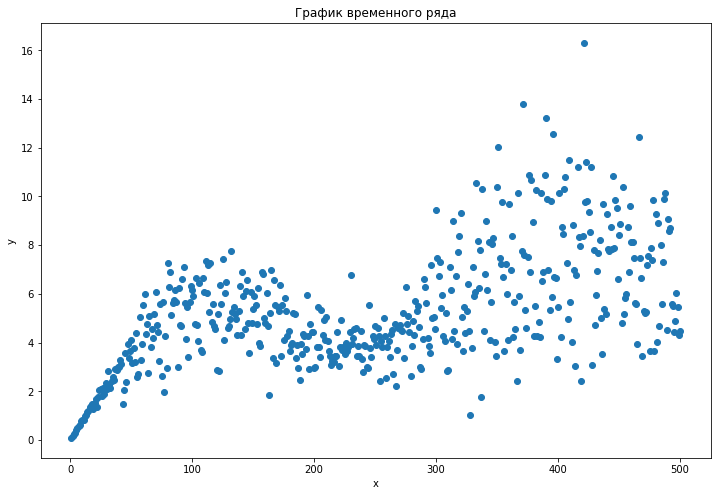

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("График временного ряда")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(model['x'],model['y'])

In [ ]:
plt.hist(model['y'], bins = 40)

# Задание 1

In [ ]:
X = model[['x']].values

In [ ]:
y = model[['y']].values

In [ ]:
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

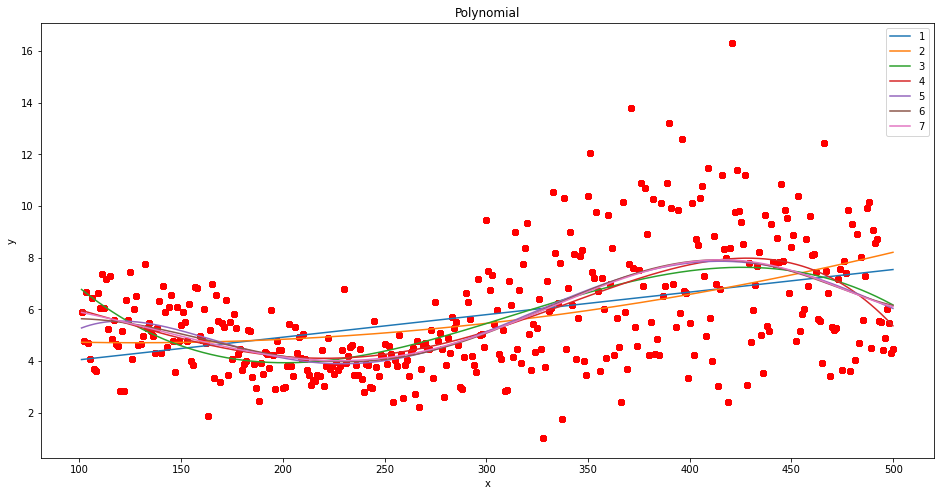

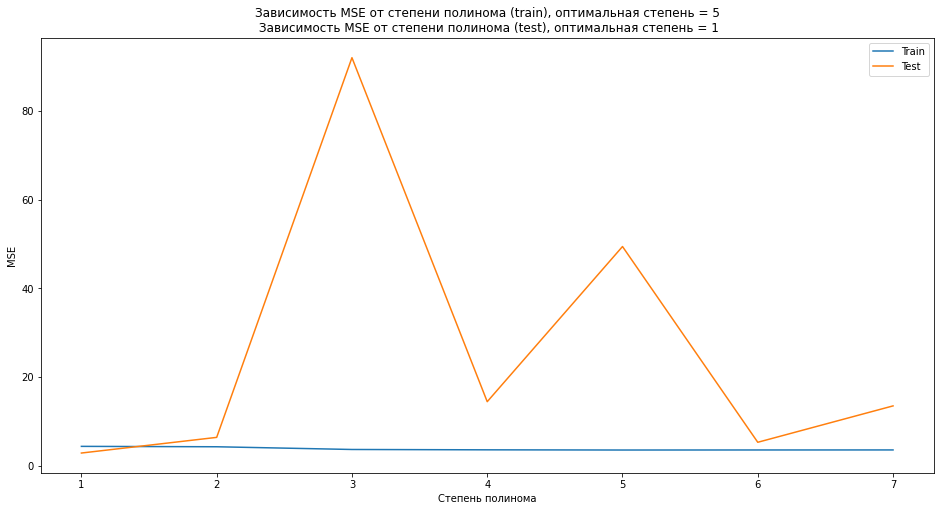

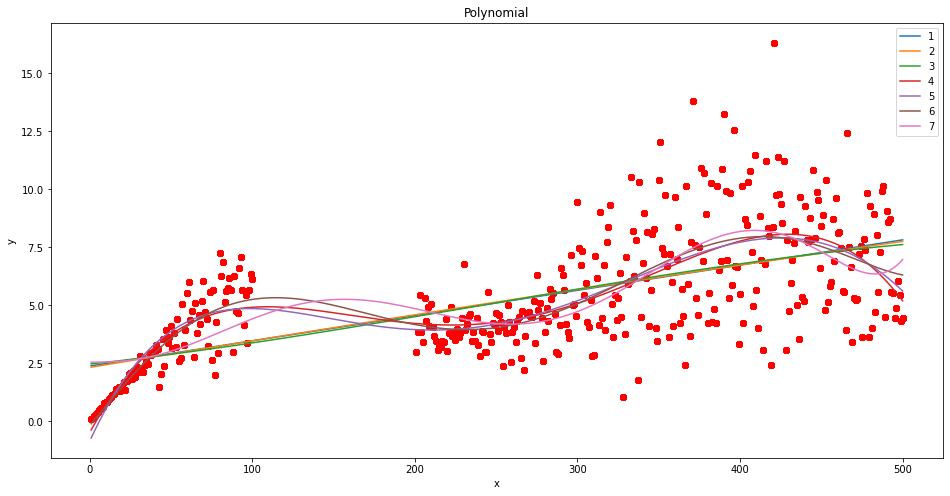

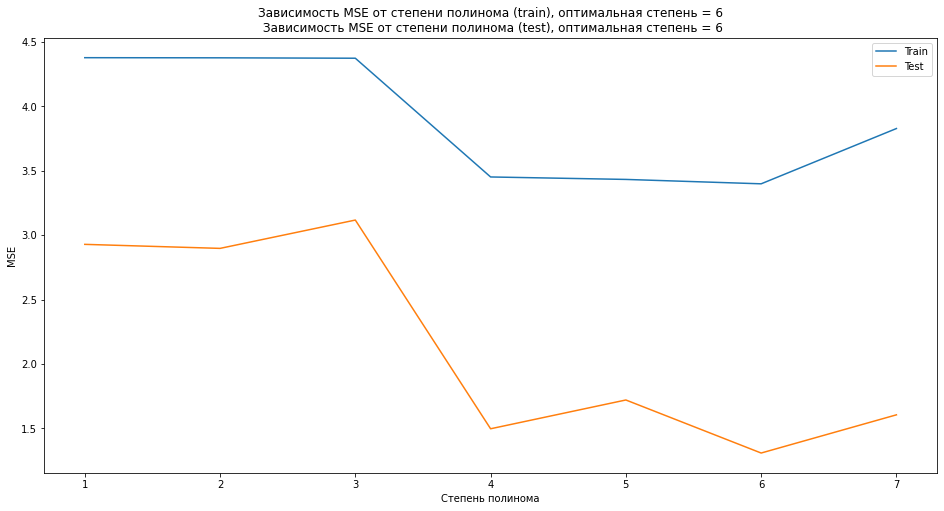

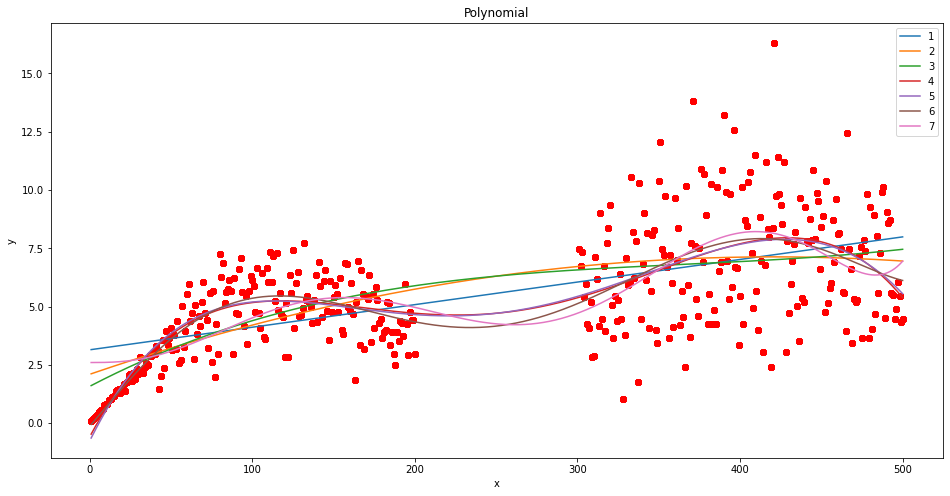

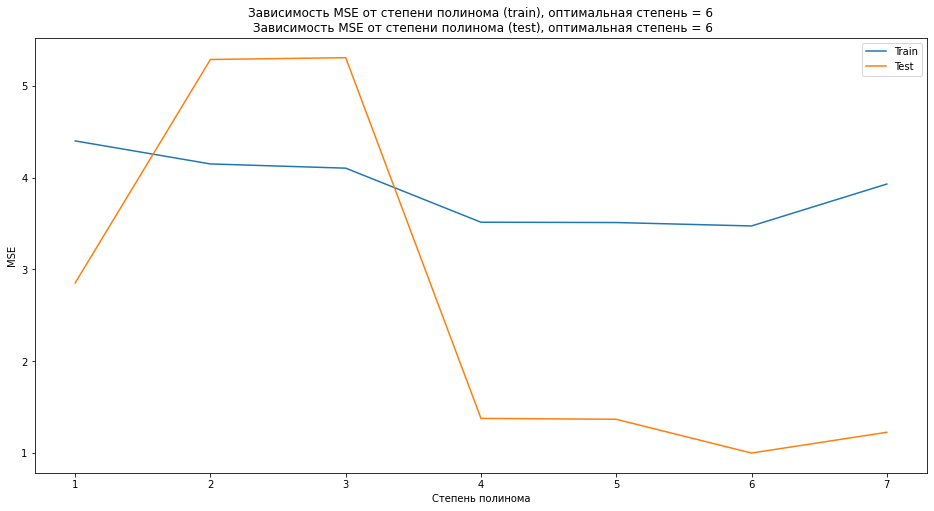

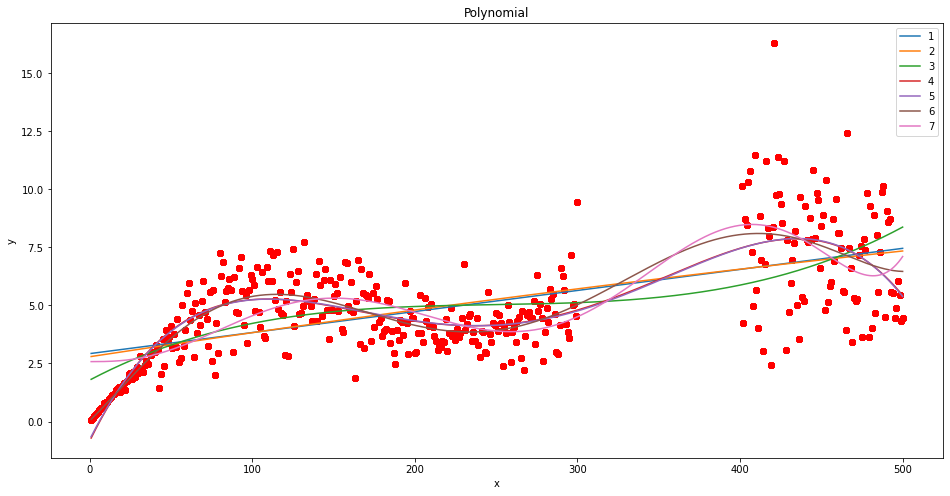

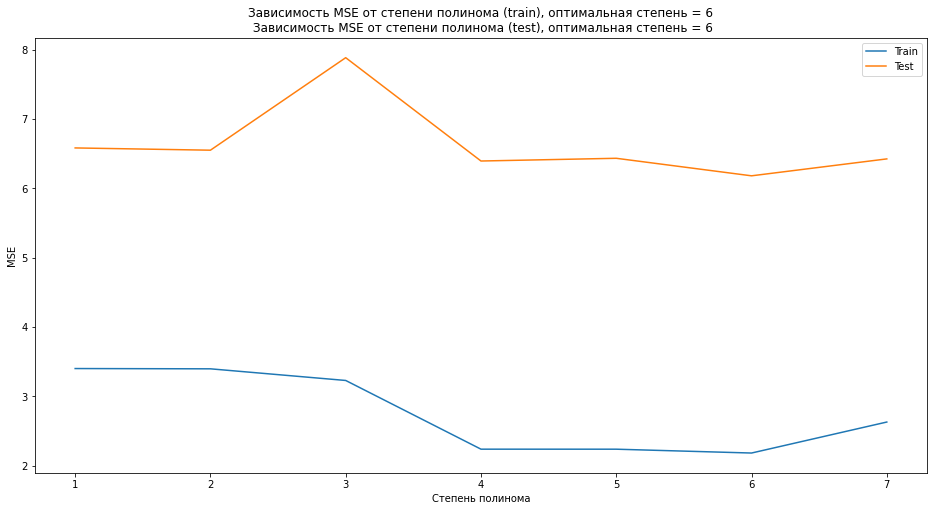

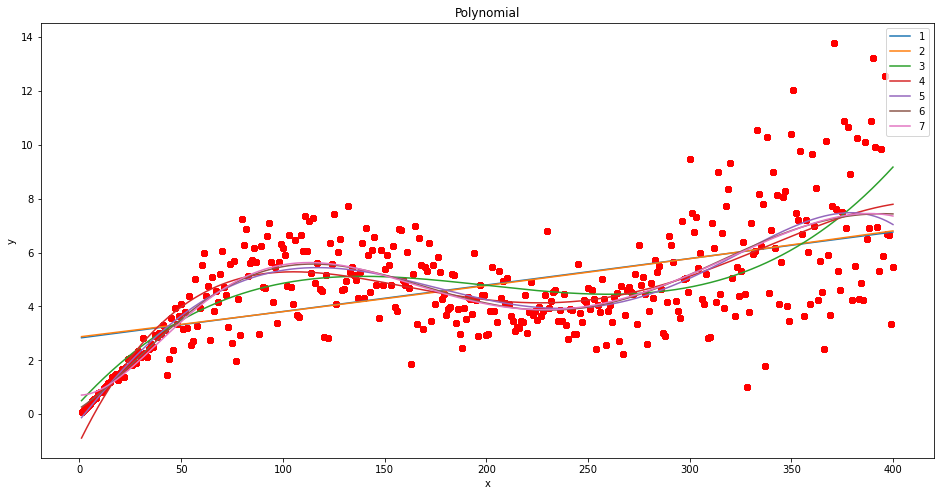

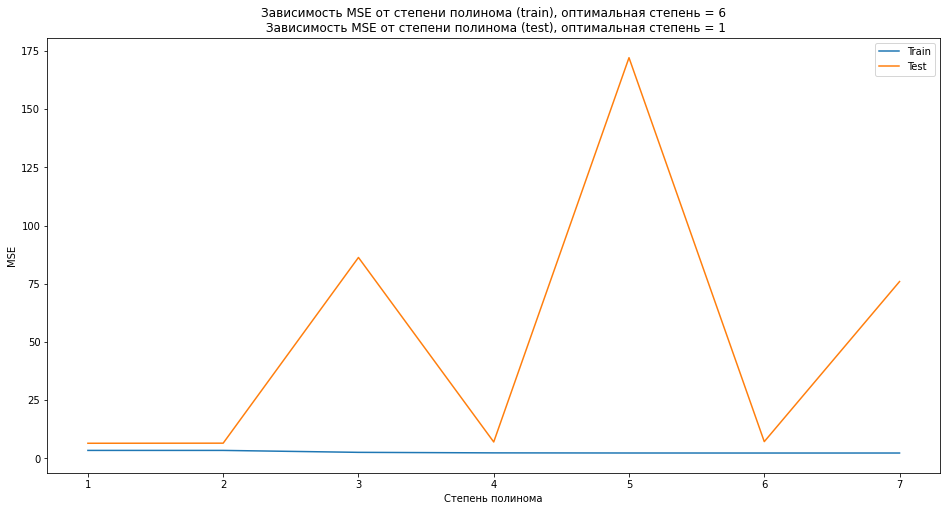

In [ ]:
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

#построение модели
for train_index, test_index in kfold.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  mse_array_train = []
  mse_array_test = []
  #перебор разных степеней полинома для X
  for i in range(1,8):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X_train) #X_train в полином
    X_poly1 = poly_reg.fit_transform(X_test) #X_test в полином
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly,y_train)
    
    X_grid = np.arange(min(X_train),max(X_train),0.1)
    X_grid = X_grid.reshape(len(X_grid),1)
    mse_array_train.append(1/len(y_train) * np.sum((y_train - lin_reg.predict(X_poly))**2))
    mse_array_test.append(1/len(y_test) * np.sum((y_test - lin_reg.predict(X_poly1))**2))
    
    plt.scatter(X_train,y_train, color='red')
    plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), label = i)
    plt.title("Polynomial")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

  fig, ax = plt.subplots(figsize=(16, 8))
  plt.plot([i for i in range(1,8)], mse_array_train, label='Train')
  plt.plot([i for i in range(1,8)], mse_array_test, label='Test')
  plt.title(f"Зависимость MSE от степени полинома (train), оптимальная степень = {np.argmin(mse_array_train)+1}\n Зависимость MSE от степени полинома (test), оптимальная степень = {np.argmin(mse_array_test)+1}")
  plt.xlabel('Степень полинома')
  plt.ylabel('MSE')
  plt.legend()
  plt.show()

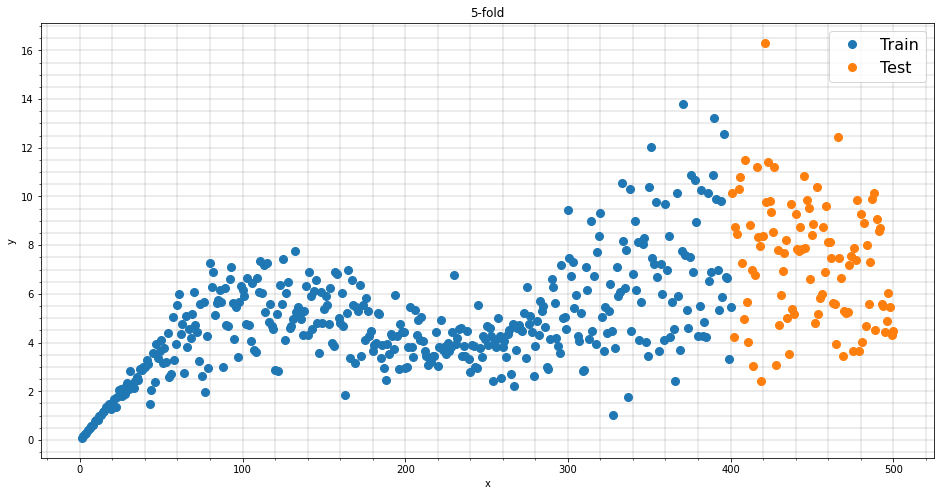

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
splitted = ax

splitted.set_title('5-fold')
splitted.set_xlabel('x')
splitted.set_ylabel('y')
splitted.grid(True, which='both', color='gray', linestyle='-', linewidth=0.3)


splitted.plot(X_train, y_train, 'o', markersize=8, label='Train')
splitted.plot(X_test, y_test, 'o', markersize=8, label='Test')
splitted.legend(fontsize=16)

plt.minorticks_on()
plt.show()

#Задание 2

In [ ]:
X = model[['x']].values
y = model[['y']].values
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

In [ ]:
def jarque_bera_test(res, alpha):
  
  jarque_bera = scipy.stats.jarque_bera(res)
  
  if jarque_bera[1] <= alpha:
    print ("Критерий Харке-Бера не выполнился,\nгипотеза H0 о нормальности распределения остатков отвергается")
    print(f"Статистика = {jarque_bera[0]}, p_value = {jarque_bera[1]}")
  else:
    print ("Критерий Харке-Бера выполнился,\nгипотеза H0 о нормальности распределения остатков принимается")
    print(f"Статистика = {jarque_bera[0]}, p_value = {jarque_bera[1]}")

In [ ]:
def chisquare_test(res, alpha):
  if scipy.stats.chisquare(res)[1] >= alpha:
    print (f"\nКритерий Хи-квадрат не выполнился (p_value = {scipy.stats.chisquare(res)[1]}),\nгипотеза H0 о нормальности распределения остатков отвергается")
  else:
    print (f"\nКритерий Хи-квадрат выполнился (p_value = {scipy.stats.chisquare(res)[1]}),\nгипотеза H0 о нормальности распределения остатков принимается")


## Для обучающей выборки

Критерий Харке-Бера не выполнился,
гипотеза H0 о нормальности распределения остатков отвергается
Статистика = 36.43662491026275, p_value = 1.2242988178812197e-08

Критерий Хи-квадрат не выполнился (p_value = 1.0),
гипотеза H0 о нормальности распределения остатков отвергается


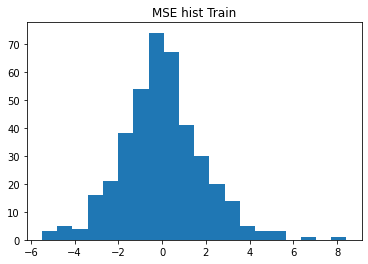

Критерий Харке-Бера не выполнился,
гипотеза H0 о нормальности распределения остатков отвергается
Статистика = 48.314713218552974, p_value = 3.225475442292236e-11

Критерий Хи-квадрат не выполнился (p_value = 1.0),
гипотеза H0 о нормальности распределения остатков отвергается


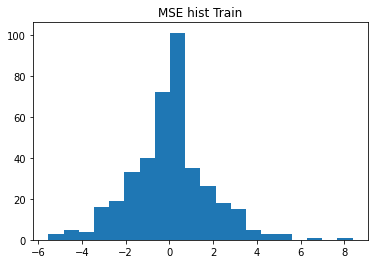

Критерий Харке-Бера не выполнился,
гипотеза H0 о нормальности распределения остатков отвергается
Статистика = 37.66301711150684, p_value = 6.631010962543371e-09

Критерий Хи-квадрат не выполнился (p_value = 1.0),
гипотеза H0 о нормальности распределения остатков отвергается


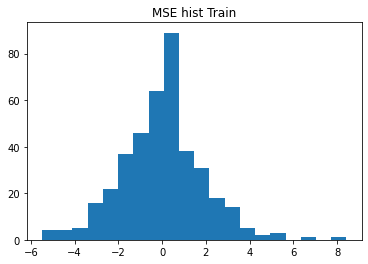

Критерий Харке-Бера не выполнился,
гипотеза H0 о нормальности распределения остатков отвергается
Статистика = 202.64643508273915, p_value = 0.0

Критерий Хи-квадрат не выполнился (p_value = 1.0),
гипотеза H0 о нормальности распределения остатков отвергается


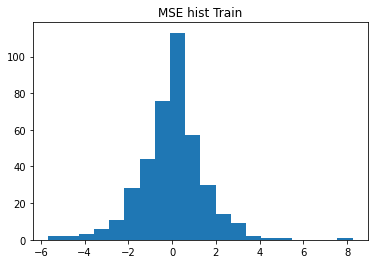

Критерий Харке-Бера не выполнился,
гипотеза H0 о нормальности распределения остатков отвергается
Статистика = 92.95376211062162, p_value = 0.0

Критерий Хи-квадрат выполнился (p_value = 0.0),
гипотеза H0 о нормальности распределения остатков принимается


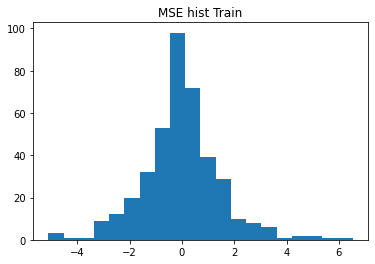

In [ ]:
estims_itog = []
for train_index, test_index in kfold.split(X):
  estims = []
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  #fig, ax = plt.subplots(figsize=(16, 8))

  poly_reg = PolynomialFeatures(degree=6)
  X_poly = poly_reg.fit_transform(X_train)
  # X_poly1 = poly_reg.fit_transform(X_test)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly,y_train)

  for j in range(len(y_train)):
    estims.append(float(y_train[j] - lin_reg.predict(X_poly)[j]))
  jarque_bera = jarque_bera_test(estims, 0.05)
  chisquare = chisquare_test(estims, 0.05)

  plt.hist(estims, bins = 20)
  plt.title(f"MSE hist Train")
  plt.show()

  estims_itog.append(estims)

  
  


## Для тестовой выборки

Критерий Харке-Бера выполнился,
 гипотеза H0 о нормальности распределения остатков принимается
Статистика = 5.342767913662246, p_value = 0.06915644950913202

Критерий Хи-квадрат не выполнился (p_value = 1.0),
гипотеза H0 о нормальности распределения остатков отвергается


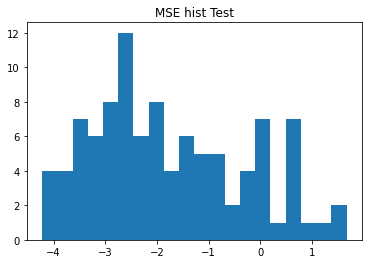

Критерий Харке-Бера выполнился,
 гипотеза H0 о нормальности распределения остатков принимается
Статистика = 0.8633366811968002, p_value = 0.6494247287883327

Критерий Хи-квадрат выполнился (p_value = 2.0664167400941142e-171),
гипотеза H0 о нормальности распределения остатков принимается


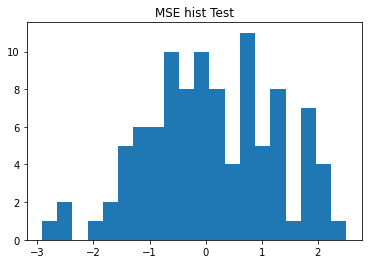

Критерий Харке-Бера не выполнился,
гипотеза H0 о нормальности распределения остатков отвергается
Статистика = 67.73967691951314, p_value = 1.9984014443252818e-15

Критерий Хи-квадрат не выполнился (p_value = 1.0),
гипотеза H0 о нормальности распределения остатков отвергается


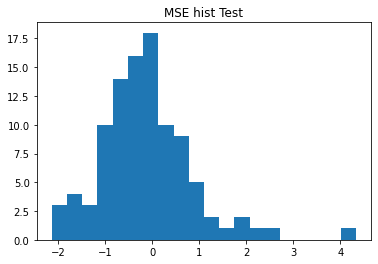

Критерий Харке-Бера выполнился,
 гипотеза H0 о нормальности распределения остатков принимается
Статистика = 2.095424474693135, p_value = 0.3507392400855831

Критерий Хи-квадрат не выполнился (p_value = 1.0),
гипотеза H0 о нормальности распределения остатков отвергается


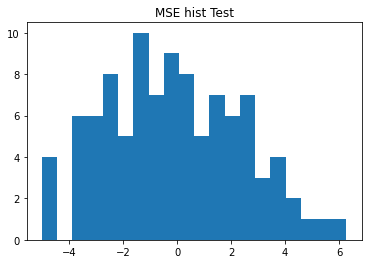

Критерий Харке-Бера выполнился,
 гипотеза H0 о нормальности распределения остатков принимается
Статистика = 0.7720483823737946, p_value = 0.6797540814233909

Критерий Хи-квадрат не выполнился (p_value = 1.0),
гипотеза H0 о нормальности распределения остатков отвергается


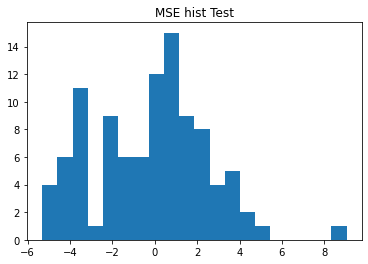

In [ ]:
estims_itog = []
for train_index, test_index in kfold.split(X):
  estims = []
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  #fig, ax = plt.subplots(figsize=(16, 8))
  poly_reg = PolynomialFeatures(degree=6)
  X_poly = poly_reg.fit_transform(X_train)
  X_poly1 = poly_reg.fit_transform(X_test)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly,y_train)

  for j in range(len(y_test)):
    estims.append(float(y_test[j] - lin_reg.predict(X_poly1)[j]))
  jarque_bera = jarque_bera_test(estims, 0.05)
  chisquare = chisquare_test(estims, 0.05)

  plt.hist(estims, bins = 20)
  plt.title(f"MSE hist Test")
  plt.show()
  estims_itog.append(estims)

# Задание 3

In [ ]:
X = model[['x']].values
y = model[['y']].values
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

In [ ]:
def Durbin_Watson_test(data):
  if durbin_watson(data) >= 1 and durbin_watson(data) <= 2:
    print(f"Критерий Дарбина-Уотсона показывает отсутствие автокорреляции (Статистика = {durbin_watson(data)})")
  else:
    print(f"Критерий Дарбина-Уотсона показывает наличие автокорреляции (Статистика = {durbin_watson(data)})")


## Для обучающей выборки

Критерий Дарбина-Уотсона показывает отсутствие автокорреляции (Статистика = 1.9374647595177488)


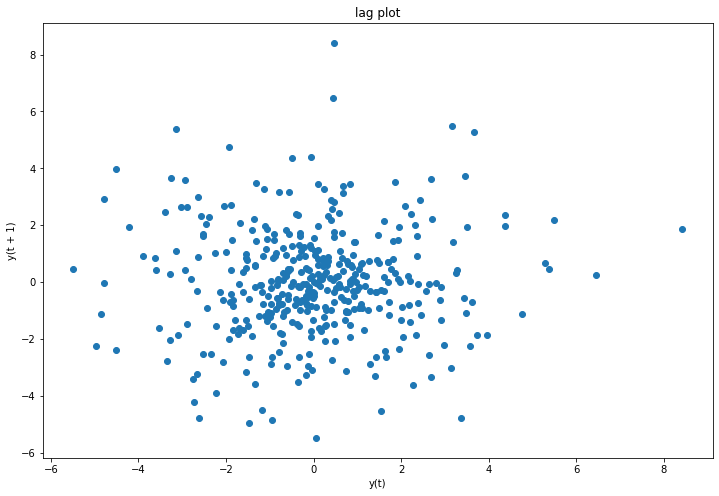

Критерий Дарбина-Уотсона показывает отсутствие автокорреляции (Статистика = 1.9284220362066464)


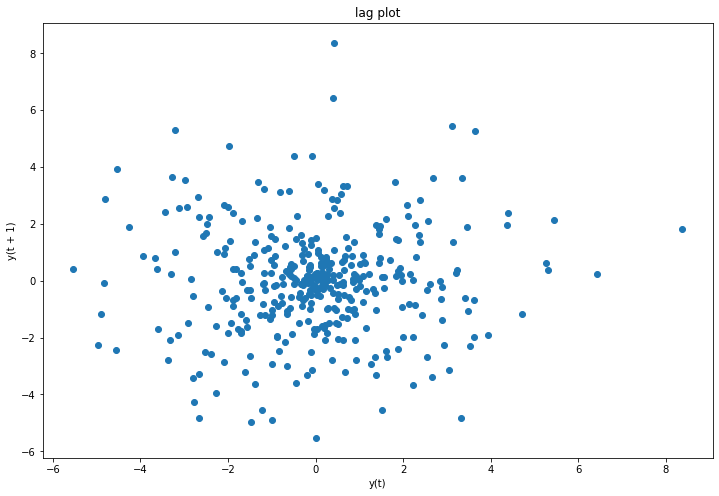

Критерий Дарбина-Уотсона показывает отсутствие автокорреляции (Статистика = 1.9699105623171567)


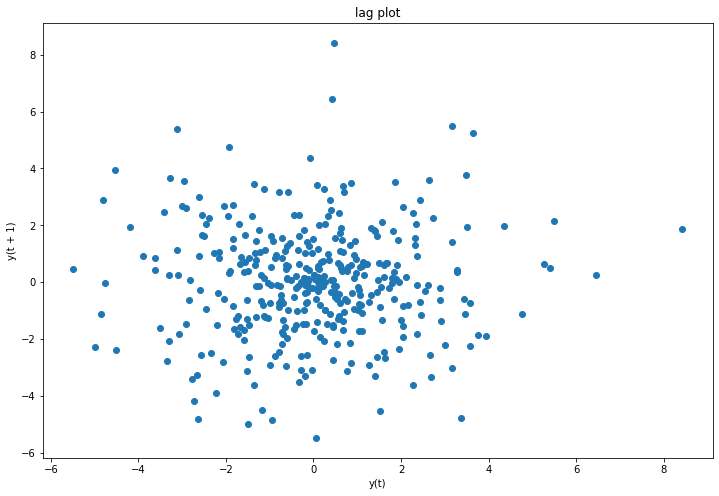

Критерий Дарбина-Уотсона показывает отсутствие автокорреляции (Статистика = 1.990312190413628)


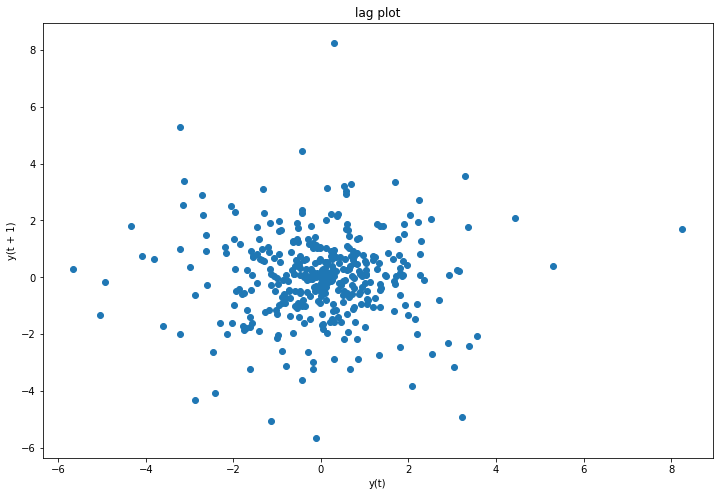

Критерий Дарбина-Уотсона показывает отсутствие автокорреляции (Статистика = 1.898836903060866)


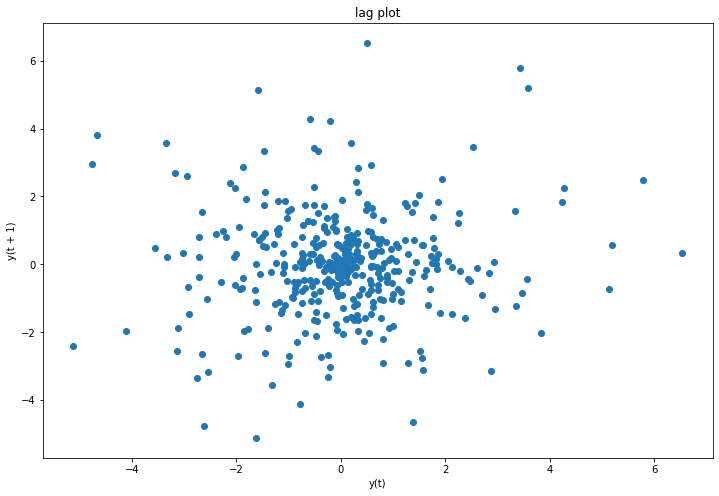

In [ ]:
estims_itog_train = []
for train_index, test_index in kfold.split(X):
  estims = []
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  poly_reg = PolynomialFeatures(degree=6)
  X_poly = poly_reg.fit_transform(X_train)
  # X_poly1 = poly_reg.fit_transform(X_test)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly,y_train)

  for j in range(len(y_train)):
    estims.append(float(y_train[j] - lin_reg.predict(X_poly)[j]))
  estims_itog_train.append(estims)
  Durbin_Watson_test(estims)
  pdestims = pd.Series(estims)

  fig, ax = plt.subplots(figsize=(12, 8))
  pd.plotting.lag_plot(pdestims, lag=1)
  plt.title(f"lag plot")
  plt.show()

## Для тестовой выборки

Критерий Дарбина-Уотсона показывает наличие автокорреляции (Статистика = 0.2983734447807276)


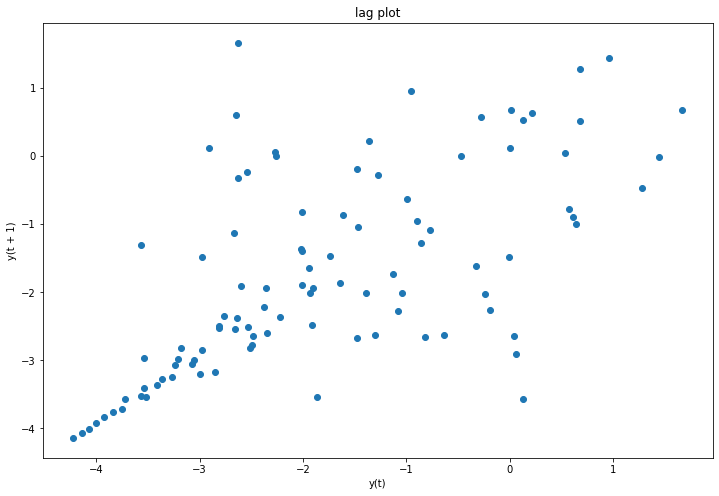

Критерий Дарбина-Уотсона показывает наличие автокорреляции (Статистика = 2.0929999395039425)


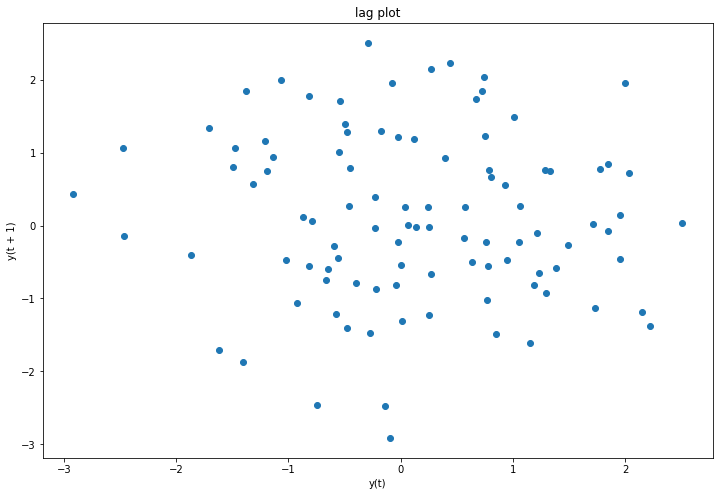

Критерий Дарбина-Уотсона показывает отсутствие автокорреляции (Статистика = 1.6355138540082337)


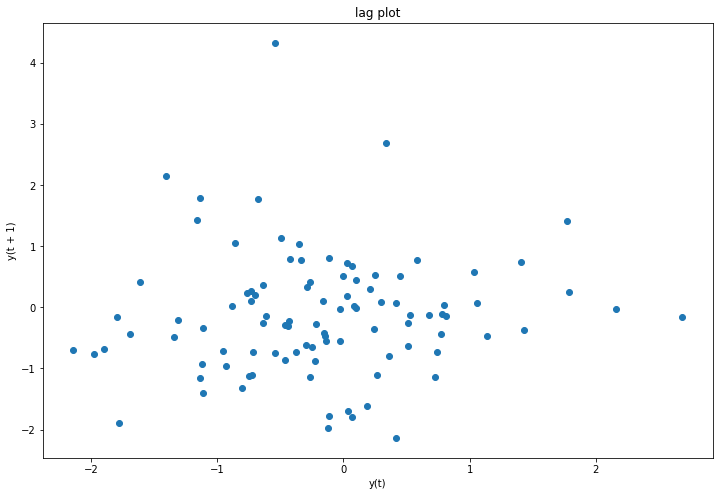

Критерий Дарбина-Уотсона показывает отсутствие автокорреляции (Статистика = 1.830276250664333)


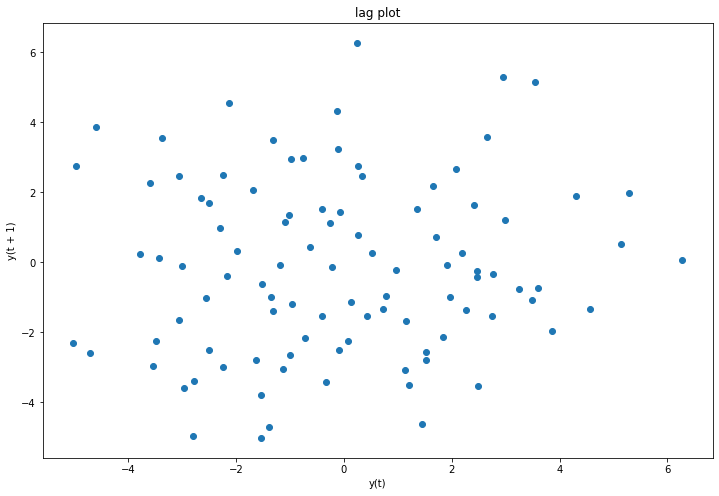

Критерий Дарбина-Уотсона показывает отсутствие автокорреляции (Статистика = 1.5887900939567763)


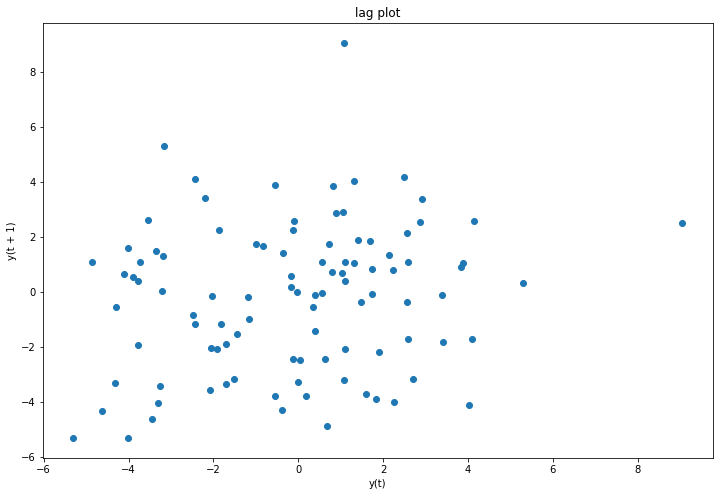

In [ ]:
estims_itog_test = []
for train_index, test_index in kfold.split(X):
  estims = []
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


  poly_reg = PolynomialFeatures(degree=6)
  X_poly = poly_reg.fit_transform(X_train)
  X_poly1 = poly_reg.fit_transform(X_test)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly,y_train)

  for j in range(len(y_test)):
    estims.append(float(y_test[j] - lin_reg.predict(X_poly1)[j]))
  estims_itog_test.append(estims)
  Durbin_Watson_test(estims)

  pdestims = pd.Series(estims)

  fig, ax = plt.subplots(figsize=(12, 8))
  pd.plotting.lag_plot(pdestims, lag=1)
  plt.title(f"lag plot")
  plt.show()

# Задание 4, 5

In [ ]:
def Breush_Pagan_test(est, exog, alpha):
  test = sms.het_breuschpagan(est, exog)
  if test[1]<=alpha:
    print("В остатках отсутствует гетероскедастичность")
    print(f"Статистика = {test[0]}, p_value = {test[1]}")
  else:
    print("В остатках присутствует гетероскедастичность")
    print(f"Статистика = {test[0]}, p_value = {test[1]}")
    

##Для обучающей выборки

In [ ]:
X = model[['x']].values
y = model[['y']].values
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

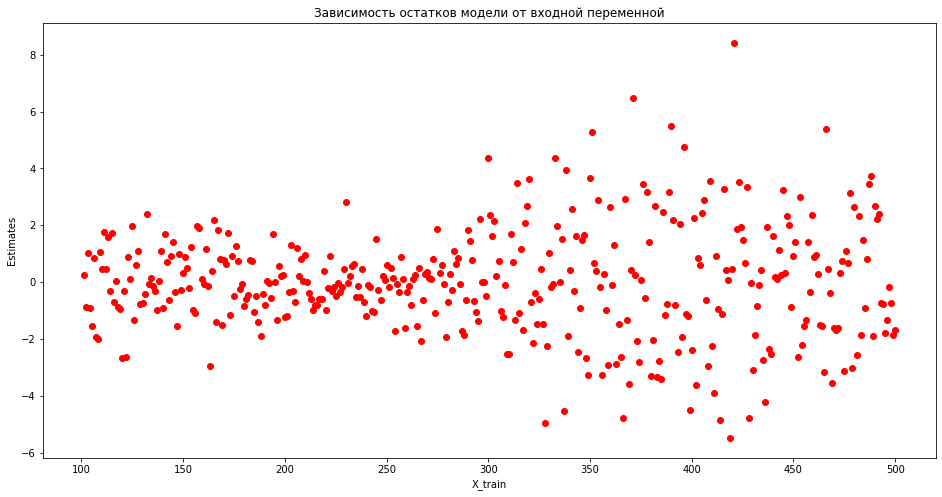

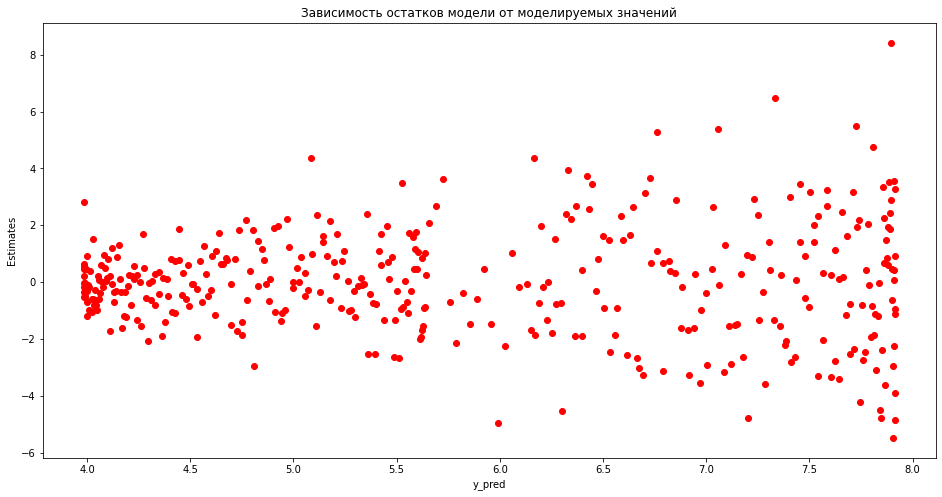

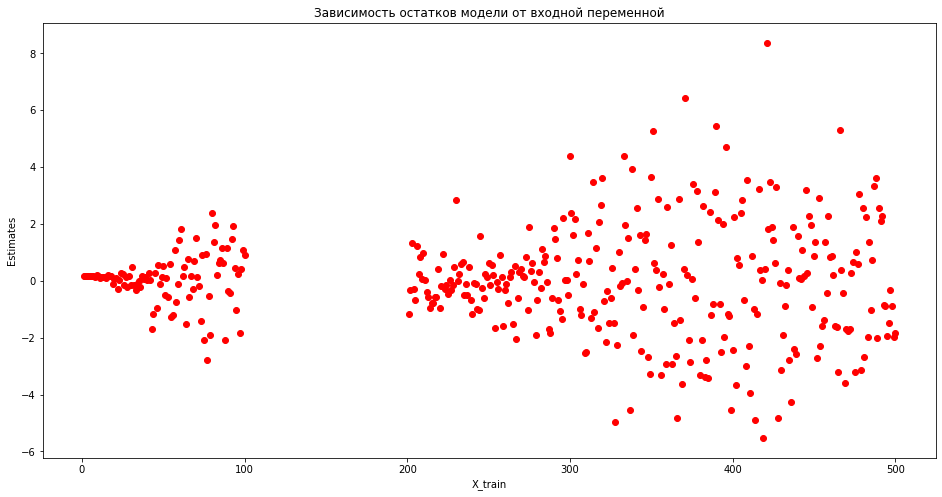

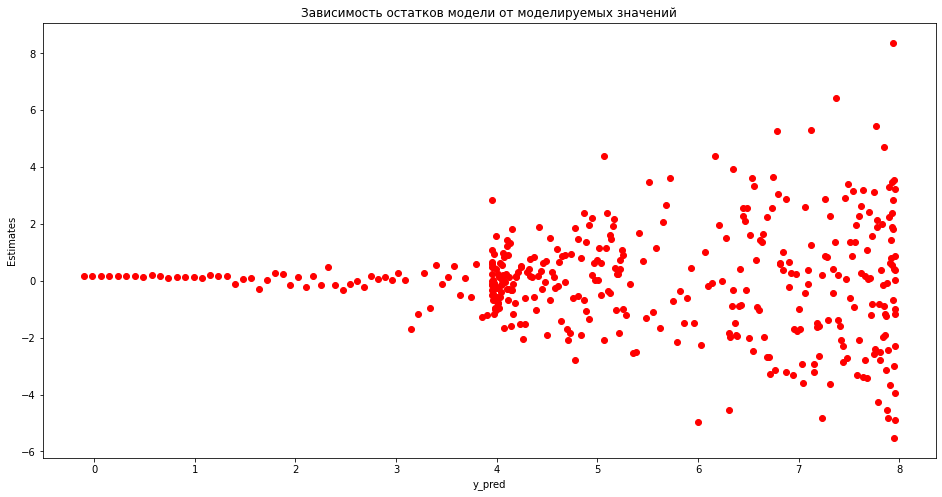

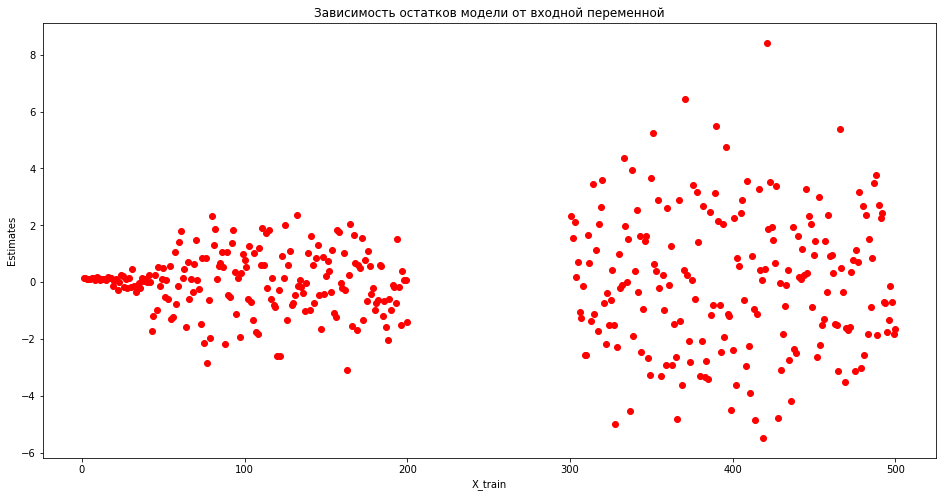

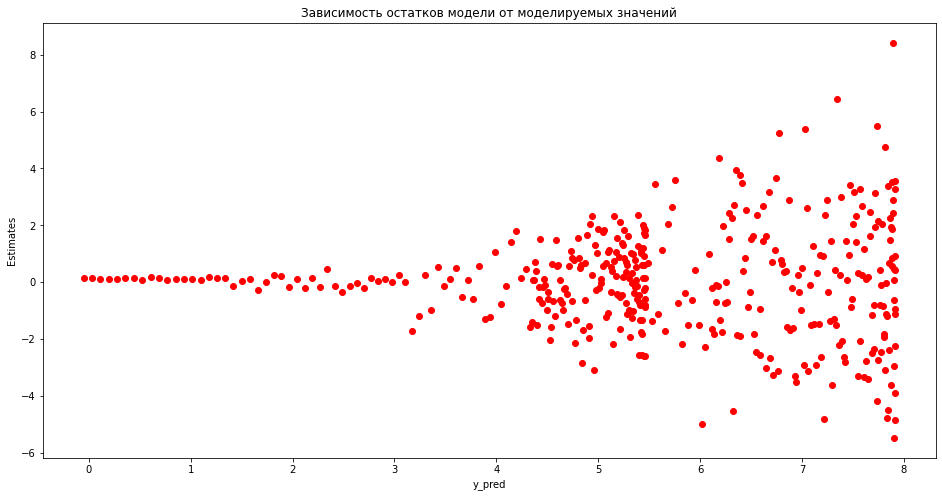

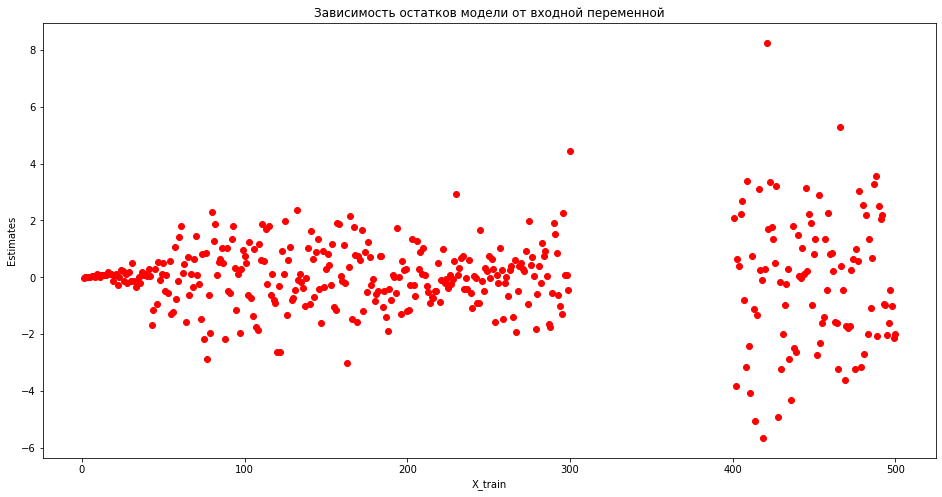

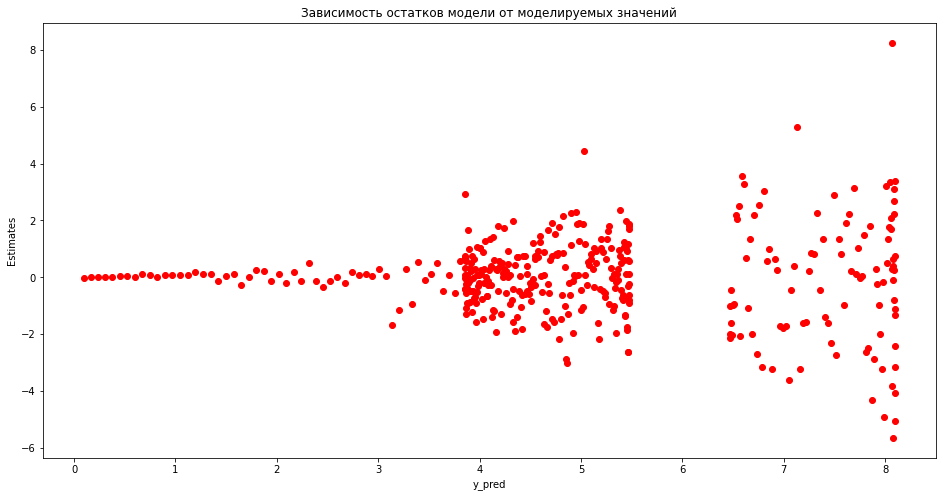

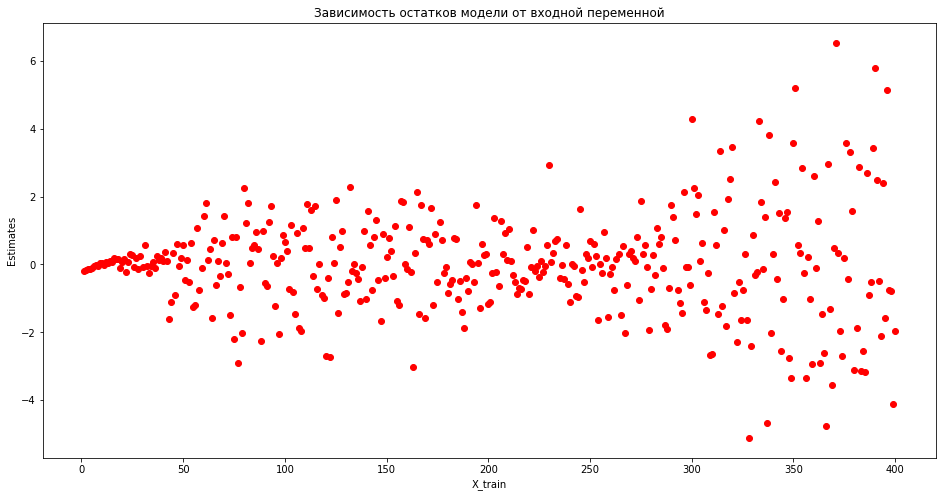

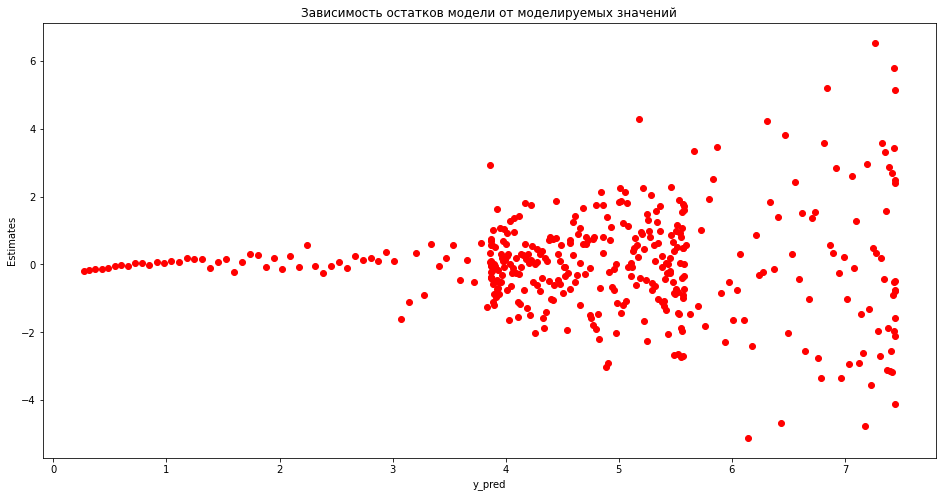

In [ ]:
estims_abs_itog_train = []
estims_itog_train = []
for train_index, test_index in kfold.split(X):
  fig, ax = plt.subplots(figsize=(16, 8))
  estims = []
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  poly_reg = PolynomialFeatures(degree=6)
  X_poly = poly_reg.fit_transform(X_train)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly,y_train)
  for k in range(len(y_train)):
    estims.append(float(y_train[k] - lin_reg.predict(X_poly)[k]))

  estims_itog_train.append(estims)
  plt.scatter(X_train,estims, color='red')
  plt.xlabel('X_train')
  plt.ylabel('Estimates')
  plt.title("Зависимость остатков модели от входной переменной")
  plt.show()
  print()
  fig, ax = plt.subplots(figsize=(16, 8))
  plt.scatter(lin_reg.predict(X_poly),estims, color='red')
  plt.xlabel('y_pred')
  plt.ylabel('Estimates')
  plt.title("Зависимость остатков модели от моделируемых значений")
  plt.show()
  print()
  

In [ ]:
for i in range(5):
  for j in range(100):
    estims_itog_train[i].insert(i*100, 0)

In [ ]:
df = pd.DataFrame(estims_itog_train).T

In [ ]:
abs_est_mean = (abs(df[0]+df[1]+df[2]+df[3]+df[4])/5).values

In [ ]:
y_1 = abs_est_mean
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

In [ ]:
for train_index, test_index in kfold.split(X):
  estims = []
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y_1[train_index], y_1[test_index]
  poly_reg = PolynomialFeatures(degree=1)
  X_poly = poly_reg.fit_transform(X_train)
  lin_reg11 = LinearRegression()
  lin_reg11.fit(X_poly,y_train)
  for j in range(len(y_train)):
    estims.append(float(y_train[j] - lin_reg11.predict(X_poly)[j]))
  Breush_Pagan_test(estims, X_poly, 0.05)
  model_linear_ols = sm.OLS(y_train, X_train)
  result_linear_ols = model_linear_ols.fit()
  print(result_linear_ols.summary())
  print()

В остатках отсутствует гетероскедастичность
Статистика = 18.860977511859023, p_value = 1.4059961990723013e-05
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.620
Model:                            OLS   Adj. R-squared (uncentered):              0.619
Method:                 Least Squares   F-statistic:                              652.1
Date:                Sat, 17 Dec 2022   Prob (F-statistic):                    6.02e-86
Time:                        12:36:02   Log-Likelihood:                         -536.34
No. Observations:                 400   AIC:                                      1075.
Df Residuals:                     399   BIC:                                      1079.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
          

## Для тестовой выборки

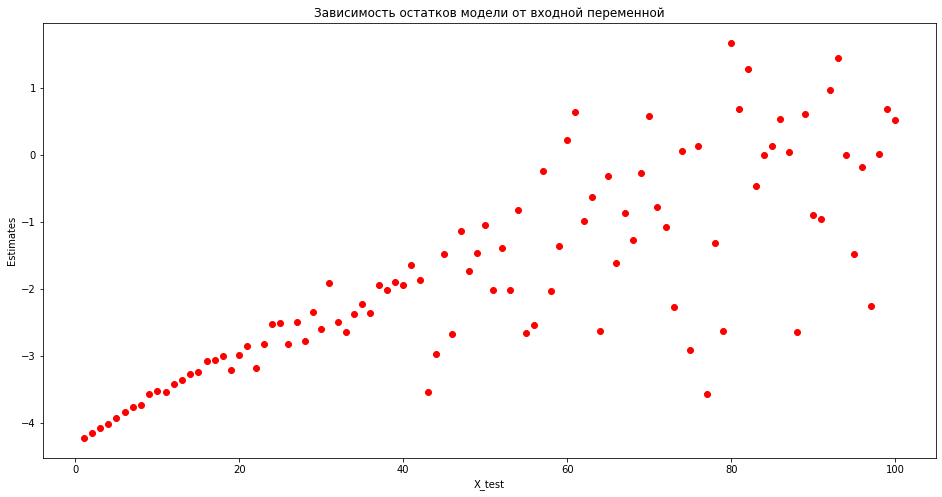

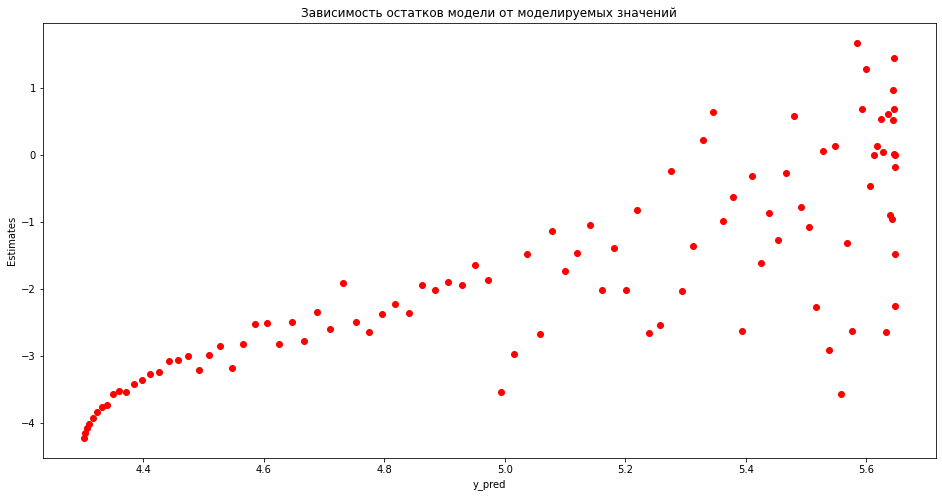

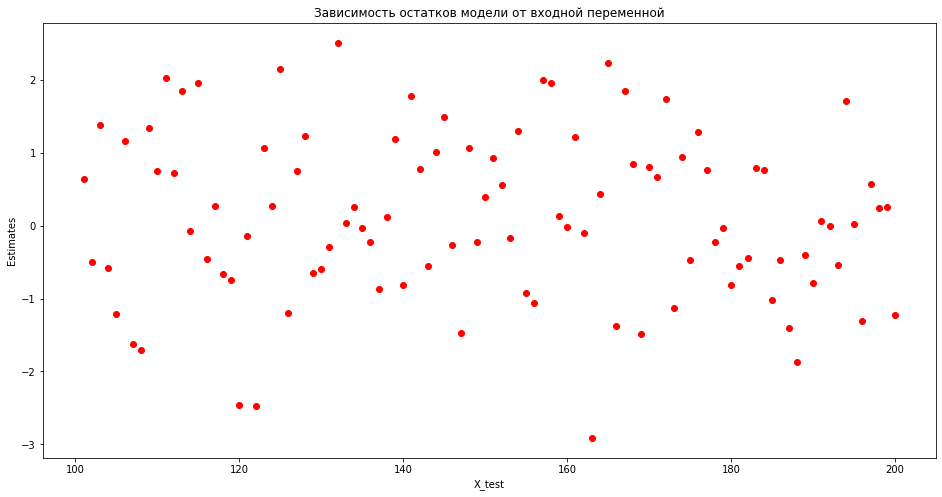

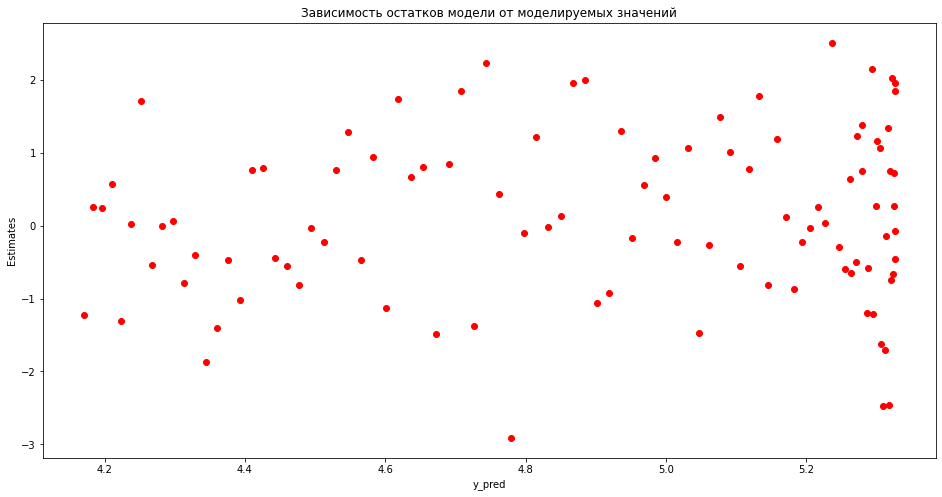

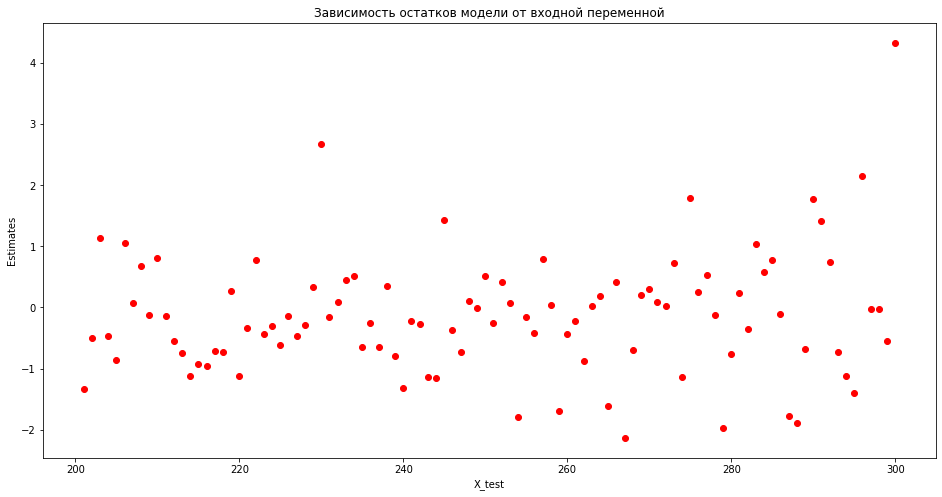

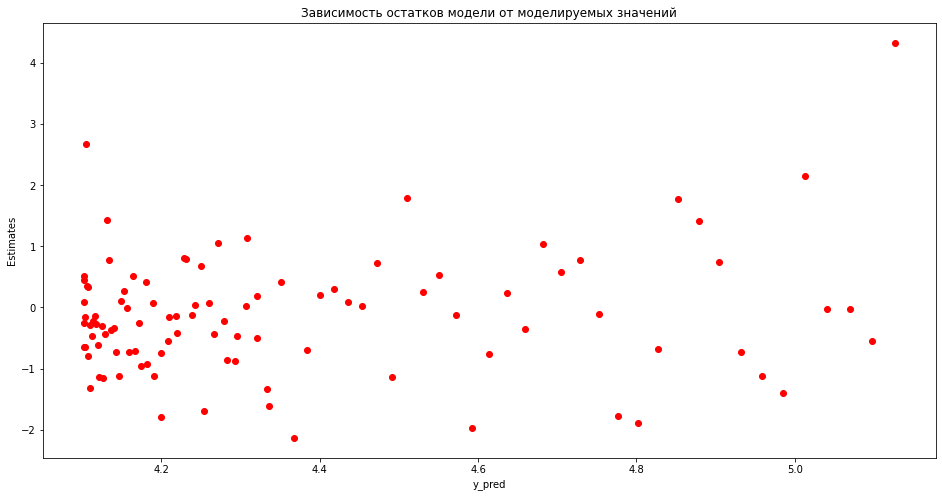

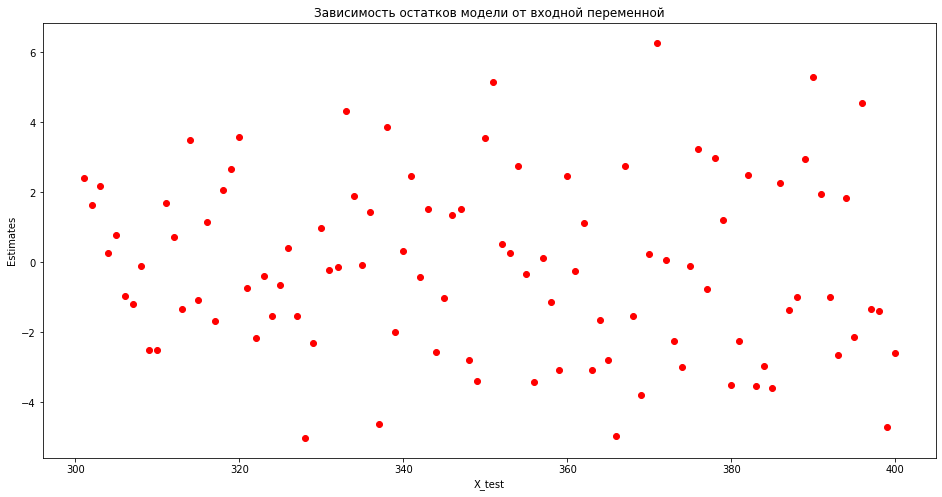

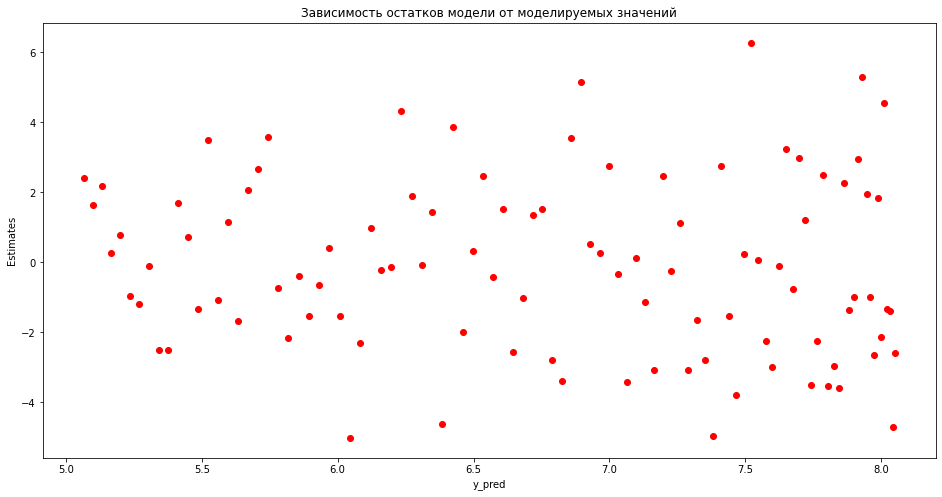

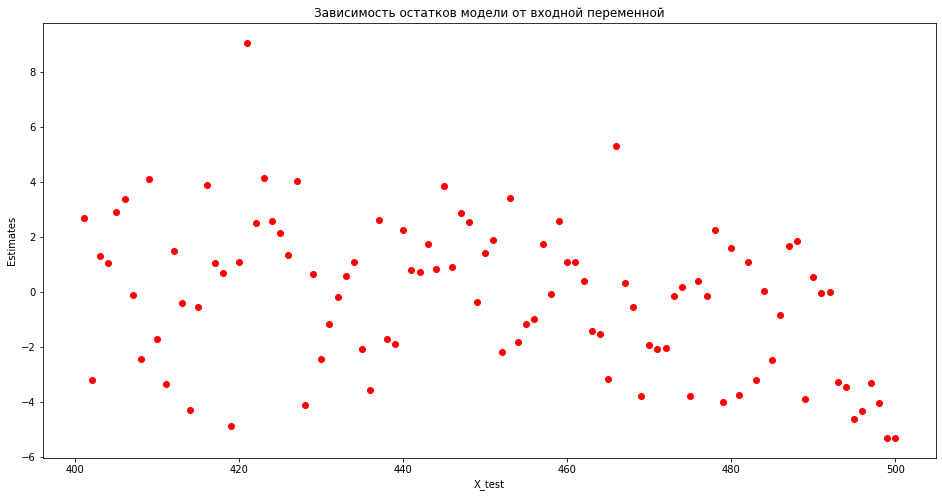

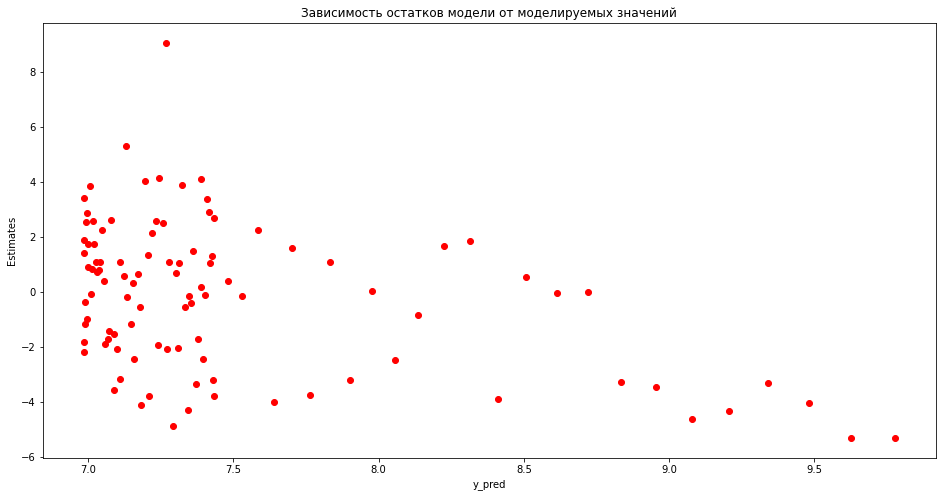

In [ ]:
estims_itog_test = []
for train_index, test_index in kfold.split(X):
  fig, ax = plt.subplots(figsize=(16, 8))
  estims = []
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  poly_reg = PolynomialFeatures(degree=6)
  X_poly = poly_reg.fit_transform(X_train)
  X_poly1 = poly_reg.fit_transform(X_test)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly,y_train)
  for k in range(len(y_test)):
    estims.append(float(y_test[k] - lin_reg.predict(X_poly1)[k]))
  estims_itog_test.append(estims)
  plt.scatter(X_test,estims, color='red')
  plt.xlabel('X_test')
  plt.ylabel('Estimates')
  plt.title("Зависимость остатков модели от входной переменной")
  plt.show()
  print()
  fig, ax = plt.subplots(figsize=(16, 8))
  plt.scatter(lin_reg.predict(X_poly1),estims, color='red')
  plt.xlabel('y_pred')
  plt.ylabel('Estimates')
  plt.title("Зависимость остатков модели от моделируемых значений")
  plt.show()
  print()

In [ ]:
for i in range(400):
  estims_itog_test[0].insert(100, 0)
for i in range(100):
  estims_itog_test[1].insert(0, 0)
for i in range(300):
  estims_itog_test[1].insert(200, 0)
for i in range(200):
  estims_itog_test[2].insert(0, 0)
for i in range(200):
  estims_itog_test[2].insert(300, 0)
for i in range(300):
  estims_itog_test[3].insert(0, 0)
for i in range(100):
  estims_itog_test[3].insert(400, 0)
for i in range(400):
  estims_itog_test[4].insert(0, 0)

In [ ]:
df1 = pd.DataFrame(estims_itog_test).T

In [ ]:
abs_est_mean_test = (abs(df1[0]+df1[1]+df1[2]+df1[3]+df1[4])).values

In [ ]:
y_2 = abs_est_mean
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

In [ ]:
for train_index, test_index in kfold.split(X):
  estims = []
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y_2[train_index], y_2[test_index]
  poly_reg = PolynomialFeatures(degree=1)
  X_poly = poly_reg.fit_transform(X_train)
  X_poly1 = poly_reg.fit_transform(X_test)
  lin_reg12 = LinearRegression()
  lin_reg12.fit(X_poly,y_train)
  for j in range(len(y_test)):
    estims.append(float(y_train[j] - lin_reg12.predict(X_poly1)[j]))
  Breush_Pagan_test(estims, X_poly1, 0.05)

В остатках отсутствует гетероскедастичность
Статистика = 4.726608410303312, p_value = 0.02969939425453697
В остатках присутствует гетероскедастичность
Статистика = 2.191384149164699, p_value = 0.13878454856117692
В остатках отсутствует гетероскедастичность
Статистика = 17.561982004513975, p_value = 2.780928898485056e-05
В остатках отсутствует гетероскедастичность
Статистика = 23.318872213069376, p_value = 1.3724672091728089e-06
В остатках отсутствует гетероскедастичность
Статистика = 20.43956989667487, p_value = 6.1544043128789325e-06
